<a href="https://colab.research.google.com/github/xslittlemaggie/Other-ML-DL-Algorithm-notes/blob/master/PCA%20from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Principal Component Analysis (PCA)</center></h1>

## Step 0: Import libraries

In [0]:
import numpy as np
import operator
from collections import Counter
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


## Step 1: Load data

In [0]:
iris = datasets.load_iris()
#iris.data
X = iris.data
Y = iris.target
data = pd.DataFrame(X)

In [0]:
species = np.chararray(Y.shape, itemsize=150)
for i in range(len(X)):
  if Y[i] == 0:
    species[i] = 'setosa'
  elif Y[i] == 1:
    species[i] = 'veriscolor'
  elif Y[i] == 2: 
    species[i] = 'virginica'

In [0]:
data.columns = ["sepal_len", "sepal_wid", "petal_len", "petal_wid"]
data["species"] = species
data.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,b'setosa'
1,4.9,3.0,1.4,0.2,b'setosa'
2,4.7,3.2,1.3,0.2,b'setosa'
3,4.6,3.1,1.5,0.2,b'setosa'
4,5.0,3.6,1.4,0.2,b'setosa'


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


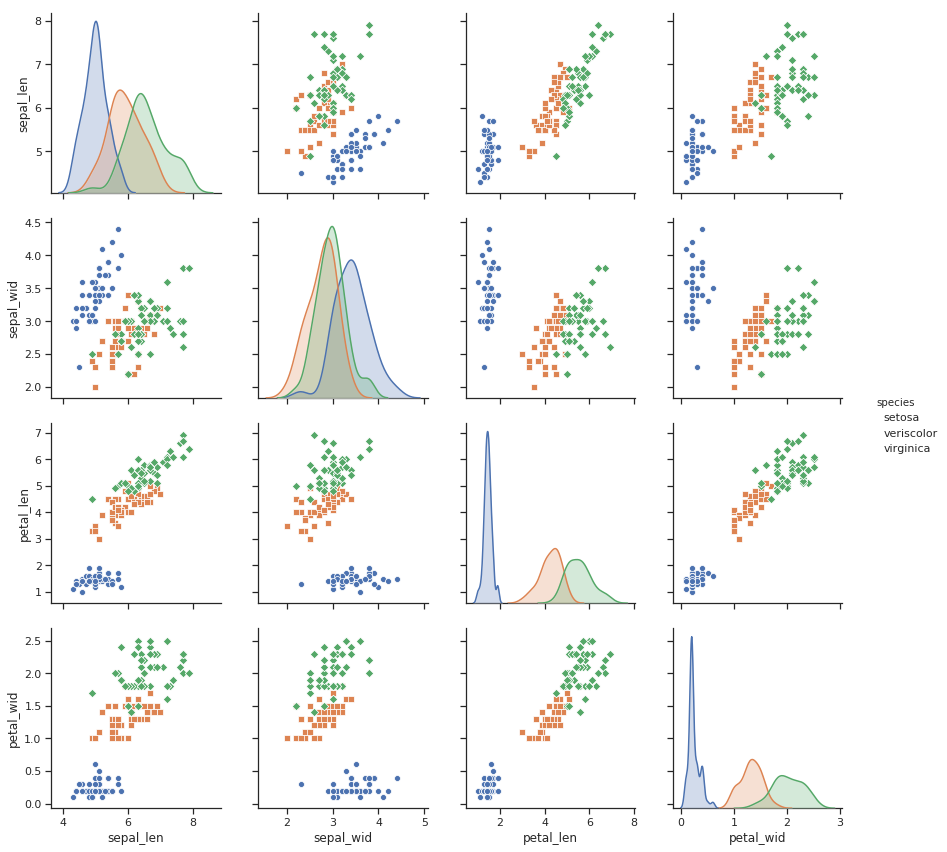

In [0]:
#sns.set(style = "ticks", color_codes = True)
g = sns.pairplot(data, vars=["sepal_len", "sepal_wid", "petal_len", "petal_wid"], 
             hue = "species", 
             markers=["o", "s", "D"], size = 3)
#plt.legend()
plt.show()

From the scatter plot above, the different species overlap, so it is difficult to disginguish the points from different species.

Next, the Principal Component Analysis will be implemented to transform the features to decorrelate the correlation of the highly correlated features.

## Step 2: PCA from scratch

### 1. Standardize features

In [0]:
X_std = StandardScaler().fit_transform(X)
print(X_std[:5, :])  # print the first 5 rows, all columns

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### 3. Calculate covariance matrix

In [0]:
mean_vec = np.mean(X_std, axis = 0)
#print(mean_vec)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)
print(cov_mat)  # print the covariance matrix, the diagonals present the variance

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [0]:
# the python numpy built-in method to calculate the covariance matrix
print("Numpy covariance matrix: \n")
print(np.cov(X_std.T))

Numpy covariance matrix: 

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [0]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Eigenvectors: \n", eig_vecs)
print()
print("Eigenvalue: \n", eig_vals)

Eigenvectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalue: 
 [2.93808505 0.9201649  0.14774182 0.02085386]


### 4. Choose the first two principal components explan the most variance

In [0]:
# make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
print(eig_pairs)
print()

# sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key = lambda x:x[0], reverse = True)
print("Eigenvalues in descending order:")
print(eig_pairs)
print()
for i in eig_pairs:
  print(i[0])

[(2.938085050199995, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624864, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449475, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462696, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

Eigenvalues in descending order:
[(2.938085050199995, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624864, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449475, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.020853862176462696, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


In [0]:
total = sum(eig_vals)
val_exp = [(i/total) * 100 for i in sorted(eig_vals, reverse = True)]
print(val_exp)
print()
cum_val_exp = np.cumsum(val_exp)
print(cum_val_exp)

[72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]

[ 72.96244541  95.8132072   99.48212909 100.        ]


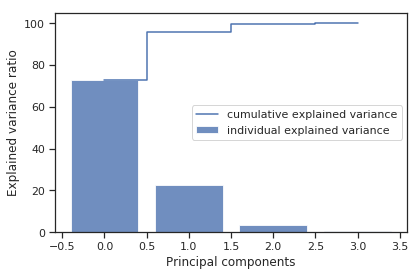

In [0]:
plt.figure(figsize = (6, 4))
plt.bar(range(4), val_exp, alpha = 0.8, align = 'center', label = "individual explained variance")
plt.step(range(4), cum_val_exp, where = 'mid', label = 'cumulative explained variance')
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### 5. Transform the 150 * 4 matrix into 150 * 2 matrix

In [0]:
# get the first two eigenvectors corresponding to the highest two eigenvalue 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4, 1),
                     eig_pairs[1][1].reshape(4, 1)))
print(matrix_w)

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [0]:
# transform the 4 dim into 2 dim
PCAs = X_std.dot(matrix_w)
print(PCAs[:5])

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


In [0]:
updated_data = {"PCA_1": PCAs[:, 0], "PCA_2": PCAs[:, 1], "species": species}
updated_data = pd.DataFrame(updated_data)

In [0]:
updated_data.head()

,PCA_1,PCA_2,species
0,-2.264703,-0.480027,b'setosa'
1,-2.080961,0.674134,b'setosa'
2,-2.364229,0.341908,b'setosa'
3,-2.299384,0.597395,b'setosa'
4,-2.389842,-0.646835,b'setosa'


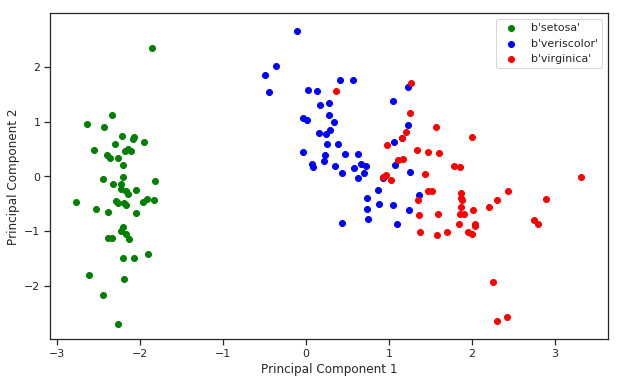

In [0]:
plt.figure(figsize = (10, 6))
for lab, col in zip((b'setosa', b'veriscolor', b'virginica'), ("green", "blue", "red")): 
  
  plt.scatter(updated_data[updated_data["species"] == lab]["PCA_1"], 
              updated_data[updated_data["species"] == lab]["PCA_2"], 
              label = lab, c = col)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc = "best")
plt.show()

From the plot above, the points from three classes are less overlapped, and easier to be disginguished.